## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  83.163066   595.489090  0.561675   1.503200  344.504032
1  17.626887   591.376874  0.143532   2.404708   86.767774
2  42.810600  1078.223073  0.621200  10.187357  671.225310
3  35.575380   216.616219  0.982864   9.930254  215.710295
4  27.966758  1572.357910  0.137290  10.459721  217.666960


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9460454	total: 61.1ms	remaining: 1m 1s
1:	learn: 0.9350383	total: 61.6ms	remaining: 30.8s
2:	learn: 0.9241725	total: 62ms	remaining: 20.6s
3:	learn: 0.9140733	total: 62.4ms	remaining: 15.5s
4:	learn: 0.9009128	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8907747	total: 63ms	remaining: 10.4s
6:	learn: 0.8782715	total: 63.4ms	remaining: 8.99s
7:	learn: 0.8662886	total: 63.7ms	remaining: 7.89s
8:	learn: 0.8559172	total: 63.9ms	remaining: 7.04s
9:	learn: 0.8446270	total: 64.3ms	remaining: 6.36s
10:	learn: 0.8349697	total: 64.6ms	remaining: 5.81s
11:	learn: 0.8218391	total: 65ms	remaining: 5.35s
12:	learn: 0.8098033	total: 65.4ms	remaining: 4.96s
13:	learn: 0.7987330	total: 65.9ms	remaining: 4.64s
14:	learn: 0.7881252	total: 66.2ms	remaining: 4.35s
15:	learn: 0.7799553	total: 66.6ms	remaining: 4.09s
16:	learn: 0.7689798	total: 67.2ms	remaining: 3.88s
17:	learn: 0.7616437	total: 67.5ms	remaining: 3.68s
18:	learn: 0.7542364	total: 67.9ms	remaining: 3.5s

82:	learn: 0.3605911	total: 94.7ms	remaining: 1.05s
83:	learn: 0.3567225	total: 95.3ms	remaining: 1.04s
84:	learn: 0.3534199	total: 95.8ms	remaining: 1.03s
85:	learn: 0.3498243	total: 96.2ms	remaining: 1.02s
86:	learn: 0.3464972	total: 96.7ms	remaining: 1.01s
87:	learn: 0.3428367	total: 97.1ms	remaining: 1s
88:	learn: 0.3396182	total: 97.5ms	remaining: 998ms
89:	learn: 0.3365867	total: 97.9ms	remaining: 990ms
90:	learn: 0.3333543	total: 98.3ms	remaining: 982ms
91:	learn: 0.3294875	total: 98.7ms	remaining: 974ms
92:	learn: 0.3259478	total: 99.1ms	remaining: 967ms
93:	learn: 0.3229095	total: 99.6ms	remaining: 960ms
94:	learn: 0.3196493	total: 100ms	remaining: 953ms
95:	learn: 0.3163536	total: 100ms	remaining: 946ms
96:	learn: 0.3138173	total: 101ms	remaining: 939ms
97:	learn: 0.3109887	total: 101ms	remaining: 933ms
98:	learn: 0.3073896	total: 102ms	remaining: 926ms
99:	learn: 0.3033854	total: 102ms	remaining: 918ms
100:	learn: 0.3004403	total: 102ms	remaining: 911ms
101:	learn: 0.2975177

284:	learn: 0.0684853	total: 182ms	remaining: 455ms
285:	learn: 0.0681792	total: 182ms	remaining: 454ms
286:	learn: 0.0678333	total: 183ms	remaining: 453ms
287:	learn: 0.0673904	total: 183ms	remaining: 453ms
288:	learn: 0.0669239	total: 183ms	remaining: 451ms
289:	learn: 0.0665205	total: 184ms	remaining: 450ms
290:	learn: 0.0660902	total: 184ms	remaining: 449ms
291:	learn: 0.0657001	total: 185ms	remaining: 448ms
292:	learn: 0.0653663	total: 185ms	remaining: 447ms
293:	learn: 0.0649255	total: 185ms	remaining: 445ms
294:	learn: 0.0646533	total: 186ms	remaining: 444ms
295:	learn: 0.0643477	total: 186ms	remaining: 443ms
296:	learn: 0.0639550	total: 187ms	remaining: 442ms
297:	learn: 0.0636115	total: 187ms	remaining: 441ms
298:	learn: 0.0632117	total: 187ms	remaining: 439ms
299:	learn: 0.0628522	total: 188ms	remaining: 439ms
300:	learn: 0.0625874	total: 188ms	remaining: 437ms
301:	learn: 0.0622455	total: 189ms	remaining: 436ms
302:	learn: 0.0618208	total: 189ms	remaining: 435ms
303:	learn: 

502:	learn: 0.0244791	total: 276ms	remaining: 273ms
503:	learn: 0.0242886	total: 277ms	remaining: 272ms
504:	learn: 0.0242236	total: 277ms	remaining: 272ms
505:	learn: 0.0240858	total: 277ms	remaining: 271ms
506:	learn: 0.0239649	total: 278ms	remaining: 270ms
507:	learn: 0.0239100	total: 278ms	remaining: 269ms
508:	learn: 0.0237755	total: 279ms	remaining: 269ms
509:	learn: 0.0236584	total: 279ms	remaining: 268ms
510:	learn: 0.0236050	total: 279ms	remaining: 267ms
511:	learn: 0.0235437	total: 280ms	remaining: 267ms
512:	learn: 0.0233837	total: 281ms	remaining: 266ms
513:	learn: 0.0232643	total: 281ms	remaining: 266ms
514:	learn: 0.0231439	total: 281ms	remaining: 265ms
515:	learn: 0.0230228	total: 282ms	remaining: 264ms
516:	learn: 0.0229813	total: 282ms	remaining: 264ms
517:	learn: 0.0229311	total: 282ms	remaining: 263ms
518:	learn: 0.0228128	total: 283ms	remaining: 262ms
519:	learn: 0.0227371	total: 283ms	remaining: 261ms
520:	learn: 0.0226342	total: 283ms	remaining: 261ms
521:	learn: 

676:	learn: 0.0114844	total: 361ms	remaining: 172ms
677:	learn: 0.0114537	total: 362ms	remaining: 172ms
678:	learn: 0.0113877	total: 362ms	remaining: 171ms
679:	learn: 0.0113532	total: 363ms	remaining: 171ms
680:	learn: 0.0113096	total: 363ms	remaining: 170ms
681:	learn: 0.0112803	total: 364ms	remaining: 170ms
682:	learn: 0.0112517	total: 364ms	remaining: 169ms
683:	learn: 0.0111884	total: 365ms	remaining: 168ms
684:	learn: 0.0111551	total: 365ms	remaining: 168ms
685:	learn: 0.0111226	total: 366ms	remaining: 167ms
686:	learn: 0.0110949	total: 366ms	remaining: 167ms
687:	learn: 0.0110341	total: 366ms	remaining: 166ms
688:	learn: 0.0109924	total: 367ms	remaining: 165ms
689:	learn: 0.0109653	total: 367ms	remaining: 165ms
690:	learn: 0.0109387	total: 368ms	remaining: 165ms
691:	learn: 0.0108874	total: 368ms	remaining: 164ms
692:	learn: 0.0108398	total: 369ms	remaining: 163ms
693:	learn: 0.0107800	total: 369ms	remaining: 163ms
694:	learn: 0.0107397	total: 370ms	remaining: 162ms
695:	learn: 

795:	learn: 0.0074605	total: 450ms	remaining: 115ms
796:	learn: 0.0074502	total: 451ms	remaining: 115ms
797:	learn: 0.0074401	total: 452ms	remaining: 114ms
798:	learn: 0.0074232	total: 453ms	remaining: 114ms
799:	learn: 0.0074133	total: 454ms	remaining: 113ms
800:	learn: 0.0074020	total: 454ms	remaining: 113ms
801:	learn: 0.0073922	total: 455ms	remaining: 112ms
802:	learn: 0.0073825	total: 456ms	remaining: 112ms
803:	learn: 0.0073714	total: 457ms	remaining: 111ms
804:	learn: 0.0073619	total: 458ms	remaining: 111ms
805:	learn: 0.0073271	total: 459ms	remaining: 110ms
806:	learn: 0.0073018	total: 460ms	remaining: 110ms
807:	learn: 0.0072772	total: 460ms	remaining: 109ms
808:	learn: 0.0072663	total: 461ms	remaining: 109ms
809:	learn: 0.0072534	total: 461ms	remaining: 108ms
810:	learn: 0.0072427	total: 462ms	remaining: 108ms
811:	learn: 0.0072295	total: 463ms	remaining: 107ms
812:	learn: 0.0072155	total: 463ms	remaining: 107ms
813:	learn: 0.0072050	total: 464ms	remaining: 106ms
814:	learn: 

895:	learn: 0.0057327	total: 530ms	remaining: 61.5ms
896:	learn: 0.0057175	total: 531ms	remaining: 61ms
897:	learn: 0.0057123	total: 532ms	remaining: 60.4ms
898:	learn: 0.0057086	total: 533ms	remaining: 59.8ms
899:	learn: 0.0056815	total: 533ms	remaining: 59.3ms
900:	learn: 0.0056778	total: 534ms	remaining: 58.7ms
901:	learn: 0.0056728	total: 535ms	remaining: 58.1ms
902:	learn: 0.0056499	total: 536ms	remaining: 57.5ms
903:	learn: 0.0056352	total: 536ms	remaining: 57ms
904:	learn: 0.0056316	total: 537ms	remaining: 56.4ms
905:	learn: 0.0056266	total: 538ms	remaining: 55.8ms
906:	learn: 0.0056003	total: 539ms	remaining: 55.3ms
907:	learn: 0.0055967	total: 540ms	remaining: 54.7ms
908:	learn: 0.0055708	total: 542ms	remaining: 54.3ms
909:	learn: 0.0055543	total: 543ms	remaining: 53.7ms
910:	learn: 0.0055508	total: 544ms	remaining: 53.1ms
911:	learn: 0.0055346	total: 545ms	remaining: 52.6ms
912:	learn: 0.0055309	total: 546ms	remaining: 52ms
913:	learn: 0.0055262	total: 547ms	remaining: 51.4ms

993:	learn: 0.0043009	total: 614ms	remaining: 3.71ms
994:	learn: 0.0042836	total: 615ms	remaining: 3.09ms
995:	learn: 0.0042684	total: 616ms	remaining: 2.47ms
996:	learn: 0.0042524	total: 617ms	remaining: 1.86ms
997:	learn: 0.0042460	total: 618ms	remaining: 1.24ms
998:	learn: 0.0042373	total: 619ms	remaining: 619us
999:	learn: 0.0042258	total: 620ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

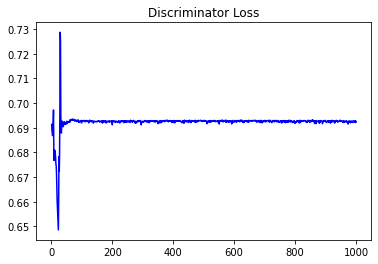

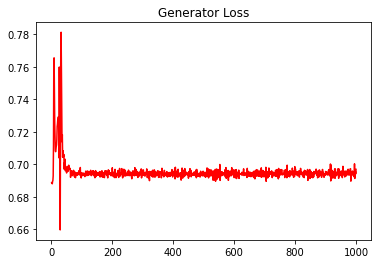

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.011665751538760582


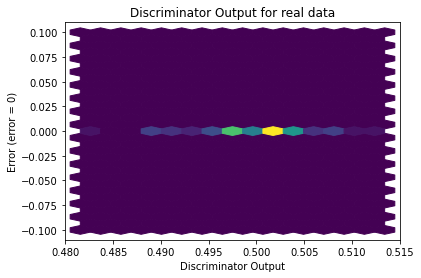

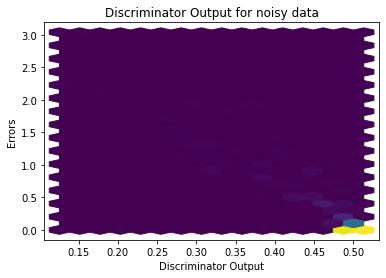

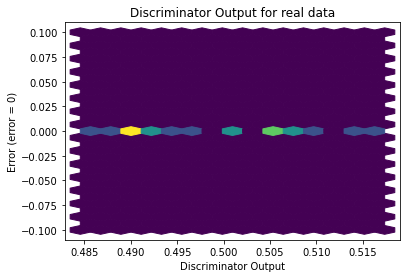

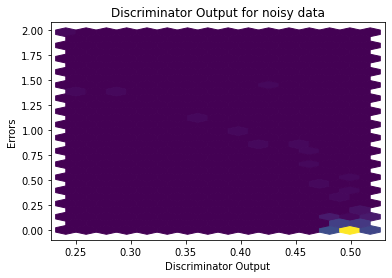

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


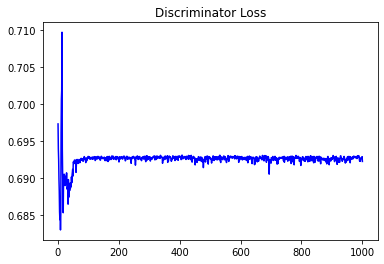

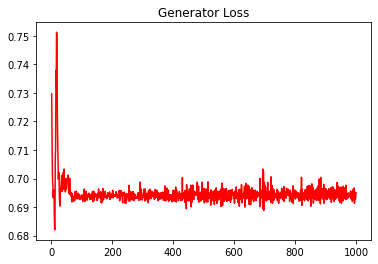

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.006876059864662022


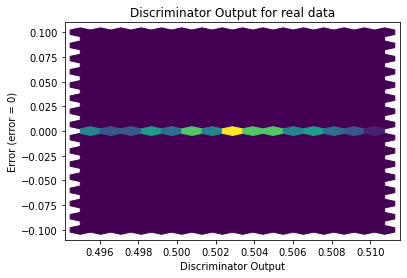

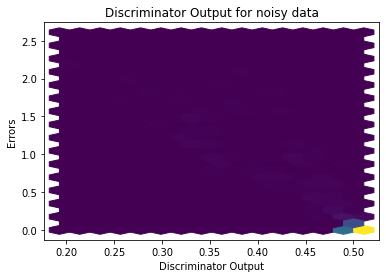

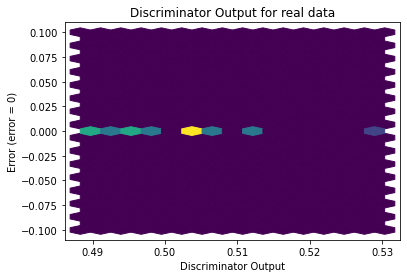

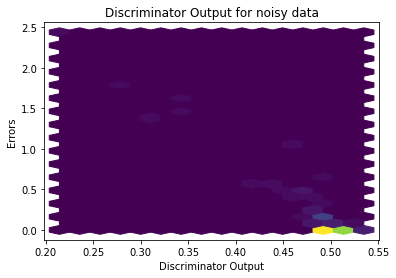

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7767]], requires_grad=True)
